**<h1 style = 'text-align: center'>Sequetial Graph</h1>**

## 1. Objectives:
- Create multiple Nodes that sequetially process and update different parts of the state
- Connect Nodes together in a graph
- Invoke the Graph and see how the state is transformed step-by-step

-> Main Goal: Create and handle multiple Nodes

In [18]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [19]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

def first_node(state: AgentState) -> AgentState:
    state['final'] = f"Hi {state['name']} !"
    return state

def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f"You are {state['age']} years old"
    return state

<h1 style = '></h1>

In [20]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()

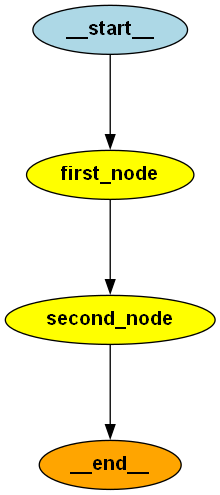

In [21]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_png()))

In [22]:
result = app.invoke({
    'name': 'Charlie',
    'age': 20
})

result

{'name': 'Charlie', 'age': 20, 'final': 'Hi Charlie !You are 20 years old'}

## 2. Exercise


In [23]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    result: str

def first_node(state: AgentState) -> AgentState:
    state['result'] = f"{state['name']}, welcome to the system!"

    return state

def second_node(state: AgentState) -> AgentState:
    state['result'] = state['result'] + f"You are {state['age']} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    skills = ''
    for index, skill in enumerate(state['skills']):
        skills += f'{skill},' if index < len(state['skills']) - 1 else f'and {skill}'
    state['result'] = state['result'] + f"You have skills in: {skills}"
    return state

In [24]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)
graph.add_node('third_node', third_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("first_node")

app  = graph.compile()

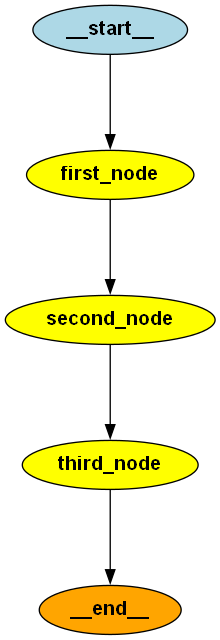

In [25]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_png()))

In [26]:
answer = app.invoke({
    "name": "Linda",
    "age": 31,
    "skills": ["Python", "Machine Learning", "LangGraph"]
})

answer

{'name': 'Linda',
 'age': 31,
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'result': 'Linda, welcome to the system!You are 31 years old!You have skills in: Python,Machine Learning,and LangGraph'}